<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Data Analysis of Singapore Rainfall

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

According to the [Meteorological Services Singapore](http://www.weather.gov.sg/climate-climate-of-singapore/#:~:text=Singapore%20is%20situated%20near%20the,month%2Dto%2Dmonth%20variation.), Singapore has typical tropical climate with adundant rainfall, high and uniform temperatures and high humidity all year round, since its situated near the equator. There are many factors that help us understand the climate of a country and in this project we are going to look into a few, especially rainfall.

Singapore’s climate is characterised by two main monsoon seasons separated by inter-monsoonal periods.  The **Northeast Monsoon** occurs from December to early March, and the **Southwest Monsoon** from June to September.

The major weather systems affecting Singapore that can lead to heavy rainfall are:

-Monsoon surges, or strong wind episodes in the Northeast Monsoon flow bringing about major rainfall events;

-Sumatra squalls, an organised line of thunderstorms travelling eastward across Singapore, having developed over the island of Sumatra or Straits of Malacca west of us;

-Afternoon and evening thunderstorms caused by strong surface heating and by the sea breeze circulation that develops in the afternoon.

Singapore’s climate station has been located at several different sites in the past 140 years. The station had been decommissioned at various points in the past due to changes to local land use in the site’s vicinity, and had to be relocated. Since 1984, the climate station has been located at **Changi**.

There are other metrics of climate such as temperature, humidity, sun shine duration, wind speed, cloud cover etc. All the dataset used in the project comes from [data.gov.sg](data.gov.sg), as recorded at the Changi climate station 


### Choose your Data

From data.gov.sg:
* [`rainfall-monthly-number-of-rain-days.csv`](../data/'rainfall-monthly-number-of-rain-days.csv'): Monthly number of rain days from 1982 to 2022. A day is considered to have “rained” if the total rainfall for that day is 0.2mm or more.
* [`rainfall-monthly-total.csv`](../data/'rainfall-monthly-total.csv'): Monthly total rain recorded in mm(millimeters) from 1982 to 2022.
* [`relative-humidity-monthly-mean.csv`](../data/'relative-humidity-monthly-mean.csv'): Monthly mean relative humidity from 1982 to 2022.
* [`sunshine-duration-monthly-mean-daily-duration.csv`](../data/'sunshine-duration-monthly-mean-daily-duration.csv'): The monthly mean sunshine hours in a day from 1982 to 2022.
* [`surface-air-temperature-monthly-mean.csv`](../data/'surface-air-temperature-monthly-mean.csv'): The monthly mean air temperature recorded from 1982 to 2022.

From Kaggle (https://www.kaggle.com/datasets/cyanaspect/singapore-weather):
* [`amk.csv`](../data/'amk.csv'): Daily meteorological data collected from Ang Mo Kio from 2014 to 2020.
* [`changi.csv`](../data/'changi.csv'): Daily meteorological data collected from Changi from 2014 to 2020.
* [`tuassouth.csv`](../data/'tuassouth.csv'): Daily meteorological data collected from Tuas South from 2014 to 2020.

## Problem Statement

*Problem statement:*

- Weather in Singapore may be rainy, windy or sunny. For a picnic essential business, the demand for their goods and services, and customer experience may be greatly influenced by the weather. This project aims to analyze monthly weather patterns over the year and locations to provide valuable insights and recommendations for optimizing picnic planning and operations based on weather conditions. This can help guide the development of tailored marketing campaigns, optimize inventory levels, adjust pricing strategies to maximize sales, and enhance customer experience.

### Outside Research

Assumptions:
1) Ideal wind speed
- 8-40 km/h for kite flying (https://www.nationalkitemonth.org/how-to-fly-a-kite/)
- < 14.5 km/h for comfortable long sitting (https://cppwind.com/outdoor-comfort-criteria/)

2) Lower rainfall, temperature and humidity, and longer sunshine hours are better for picnics
- Relative humidity is best at 30-50 percent (https://www.mayoclinic.org/diseases-conditions/common-cold/in-depth/humidifiers/art-20048021)
- Rainfall may ruin picnic experience


To validate data ranges, maximum values were compared with the ones from the following website. (http://www.weather.gov.sg/climate-historical-extremes/)  
Information on possible explanation of trends were taken from the following website. (http://www.weather.gov.sg/climate-climate-of-singapore/)

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
# Code:
def mean_value(list1):
    total = 0
    for number in list1:
        total += number
    mean = total / len(list1)
    return mean

# Test:
list2 = [1,2,3,4,5]
print(mean_value(list2))

3.0


2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [2]:
# Code:
def std_dev(list1):
    n = len(list1)
    mean = mean_value(list1)
    sum = 0
    for x in list1:
        sum += (x - mean)**2
    sigma = (sum/n)**0.5
    return sigma

# Test:
print(std_dev(list2))

1.4142135623730951


--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [3]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import and Cleaning

### Data Import & Cleaning

Import all the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary. Make sure to comment your code to showcase the intent behind the data processing step.
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values and datatype.
3. Check for any obvious issues with the observations.
4. Fix any errors you identified in steps 2-3.
5. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If the month column data is better analyzed as month and year, create new columns for the same
6. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
7. Drop unnecessary rows (if needed).
8. Merge dataframes that can be merged.
    - Since different climate metrics are in month format, you can merge them into one single dataframe for easier analysis
9. Perform any additional cleaning that you feel is necessary.
10. Save your cleaned and merged dataframes as csv files.

In [4]:
# Importing datasets
num_raindays = pd.read_csv('../data/rainfall-monthly-number-of-rain-days.csv', parse_dates=['month'])
total_rainfall = pd.read_csv('../data/rainfall-monthly-total.csv', parse_dates=['month'])
mean_sunshine = pd.read_csv('../data/sunshine-duration-monthly-mean-daily-duration.csv', parse_dates=['month'])
air_temp = pd.read_csv('../data/surface-air-temperature-monthly-mean.csv', parse_dates=['month'])
mean_humidity = pd.read_csv('../data/relative-humidity-monthly-mean.csv', parse_dates=['month'])
amk = pd.read_csv('../data/amk.csv')
changi = pd.read_csv('../data/changi.csv')
tuas_south = pd.read_csv('../data/tuassouth.csv')

In [5]:
# Display first 5 rows of num_raindays dataframe
display(num_raindays.head())

# Check for missing values and datatype
display(num_raindays.info())

# Validating numeric data (min, max, mean) whether if it makes sense
display(num_raindays.describe())

,month,no_of_rainy_days
0,1982-01-01,10
1,1982-02-01,5
2,1982-03-01,11
3,1982-04-01,14
4,1982-05-01,10


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   month             488 non-null    datetime64[ns]
 1   no_of_rainy_days  488 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 7.8 KB


None

,no_of_rainy_days
count,488.000000
mean,14.061475
std,4.947394
min,1.000000
25%,11.000000
50%,14.000000
75%,18.000000
max,27.000000


In [6]:
# Display first 5 rows of total_rainfall
display(total_rainfall.head())

# Check for missing values and datatype
display(total_rainfall.info())

# Validating numeric data (min, max, mean) whether if it makes sense
display(total_rainfall.describe())

,month,total_rainfall
0,1982-01-01,107.1
1,1982-02-01,27.8
2,1982-03-01,160.8
3,1982-04-01,157.0
4,1982-05-01,102.2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   month           488 non-null    datetime64[ns]
 1   total_rainfall  488 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.8 KB


None

,total_rainfall
count,488.000000
mean,177.163730
std,113.916029
min,0.200000
25%,93.850000
50%,159.450000
75%,238.075000
max,765.900000


In [7]:
# Display first 5 rows of mean_sunshine
display(mean_sunshine.head())

# Check for missing values and datatype
display(mean_sunshine.info())

# Validating numeric data (min, max, mean) whether if it makes sense
display(mean_sunshine.describe())

,month,mean_sunshine_hrs
0,1982-01-01,5.6
1,1982-02-01,7.6
2,1982-03-01,5.1
3,1982-04-01,4.7
4,1982-05-01,5.8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   month              491 non-null    datetime64[ns]
 1   mean_sunshine_hrs  491 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.8 KB


None

,mean_sunshine_hrs
count,491.000000
mean,5.676171
std,1.212024
min,2.700000
25%,4.800000
50%,5.600000
75%,6.450000
max,9.300000


In [8]:
# Display first 5 rows of air_temp
display(air_temp.head())

# Check for missing values and datatype
display(air_temp.info())

# Validating numeric data (min, max, mean) whether if it makes sense
display(air_temp.describe())

,month,mean_temp
0,1982-01-01,25.9
1,1982-02-01,27.1
2,1982-03-01,27.2
3,1982-04-01,27.0
4,1982-05-01,28.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   month      491 non-null    datetime64[ns]
 1   mean_temp  491 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.8 KB


None

,mean_temp
count,491.000000
mean,27.678615
std,0.799905
min,25.400000
25%,27.100000
50%,27.700000
75%,28.300000
max,29.500000


In [9]:
# Display first 5 rows of mean_humidity
display(mean_humidity.head())

# Check for missing values and datatype
display(mean_humidity.info())

# Validating numeric data (min, max, mean) whether if it makes sense
display(mean_humidity.describe())

,month,mean_rh
0,1982-01-01,81.2
1,1982-02-01,79.5
2,1982-03-01,82.3
3,1982-04-01,85.9
4,1982-05-01,83.2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   month    491 non-null    datetime64[ns]
 1   mean_rh  491 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.8 KB


None

,mean_rh
count,491.000000
mean,82.224644
std,3.417366
min,72.000000
25%,79.900000
50%,82.600000
75%,84.650000
max,90.700000


In [10]:
# Joining num_raindays, total_rainfall, mean_sunshine, air_temp, and mean_humidity dataframes
join1 = pd.merge(num_raindays, total_rainfall, on='month', how='inner')
join2 = pd.merge(join1, mean_sunshine, on='month', how='inner')
join3 = pd.merge(join2, air_temp, on='month', how='inner')
weather = pd.merge(join3, mean_humidity, on='month', how='inner')
display(weather.head())

,month,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,mean_temp,mean_rh
0,1982-01-01,10,107.1,5.6,25.9,81.2
1,1982-02-01,5,27.8,7.6,27.1,79.5
2,1982-03-01,11,160.8,5.1,27.2,82.3
3,1982-04-01,14,157.0,4.7,27.0,85.9
4,1982-05-01,10,102.2,5.8,28.0,83.2


In [11]:
# Creating separate columns for year and month
weather['year'] = weather['month'].dt.year
weather['month'] = weather['month'].dt.month
weather = weather[['year','month','no_of_rainy_days','total_rainfall','mean_sunshine_hrs','mean_temp','mean_rh']]
print(weather.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 488 entries, 0 to 487
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               488 non-null    int64  
 1   month              488 non-null    int64  
 2   no_of_rainy_days   488 non-null    int64  
 3   total_rainfall     488 non-null    float64
 4   mean_sunshine_hrs  488 non-null    float64
 5   mean_temp          488 non-null    float64
 6   mean_rh            488 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 30.5 KB
None


In [12]:
# First 5 rows of amk
display(amk.head())

# Filtering dataframe for only necessary columns
amk_filtered = amk[['Station', 'Year', 'Month', 'Day', 'Daily Rainfall Total (mm)', 'Mean Temperature (°C)', 'Mean Wind Speed (km/h)']]

# Check for datatype
print(amk_filtered.dtypes)

# Check for missing values
print(amk_filtered.isna().sum())

# Validating numeric data (min, max, mean) whether if it makes sense
display(amk_filtered.describe())

# Drop missing values from amk
amk_filtered.dropna(inplace=True)
print(amk_filtered.isna().sum())

,Unnamed: 0,Station,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
0,0,Ang Mo Kio,2014,1,1,0.0,0.0,0.0,0.0,26.3,28.7,24.5,7.2,29.9
1,1,Ang Mo Kio,2014,1,2,0.0,0.0,0.0,0.0,26.9,30.4,24.6,8.2,32.0
2,2,Ang Mo Kio,2014,1,3,8.8,8.6,8.8,8.8,26.5,30.1,24.8,7.1,29.5
3,3,Ang Mo Kio,2014,1,4,1.4,1.4,1.4,1.4,26.6,30.9,24.7,4.2,30.2
4,4,Ang Mo Kio,2014,1,5,7.2,1.6,3.2,5.2,24.5,25.5,23.3,5.2,24.1


Station                       object
Year                           int64
Month                          int64
Day                            int64
Daily Rainfall Total (mm)    float64
Mean Temperature (°C)        float64
Mean Wind Speed (km/h)       float64
dtype: object
Station                       0
Year                          0
Month                         0
Day                           0
Daily Rainfall Total (mm)    45
Mean Temperature (°C)        48
Mean Wind Speed (km/h)       45
dtype: int64


,Year,Month,Day,Daily Rainfall Total (mm),Mean Temperature (°C),Mean Wind Speed (km/h)
count,2557.000000,2557.000000,2557.000000,2512.000000,2509.000000,2512.000000
mean,2017.000782,6.522487,15.730935,6.186823,27.961020,7.588893
std,2.000587,3.449499,8.802361,12.500927,1.211641,3.880224
min,2014.000000,1.000000,1.000000,0.000000,22.500000,2.900000
25%,2015.000000,4.000000,8.000000,0.000000,27.100000,4.900000
50%,2017.000000,7.000000,16.000000,0.200000,28.000000,6.500000
75%,2019.000000,10.000000,23.000000,6.200000,28.900000,8.600000
max,2020.000000,12.000000,31.000000,101.600000,31.100000,22.000000


Station                      0
Year                         0
Month                        0
Day                          0
Daily Rainfall Total (mm)    0
Mean Temperature (°C)        0
Mean Wind Speed (km/h)       0
dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_1028\2994736615.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amk_filtered.dropna(inplace=True)


In [13]:
# First 5 rows of changi
display(changi.head())

# Filtering dataframe for only necessary columns
changi_filtered = changi[['Station', 'Year', 'Month', 'Day', 'Daily Rainfall Total (mm)', 'Mean Temperature (°C)', 'Mean Wind Speed (km/h)']]

# Check for datatype
print(changi_filtered.dtypes)

# Check for missing values
print(changi_filtered.isna().sum())

# Validating numeric data (min, max, mean) whether if it makes sense
display(changi_filtered.describe())

# Drop missing values
changi_filtered.dropna(inplace=True)
print(changi_filtered.isna().sum())

,Unnamed: 0,Station,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
0,0,Changi,2014,1,1,0.0,0.0,0.0,0.0,26.7,29.0,24.9,10.0,29.9
1,1,Changi,2014,1,2,0.0,0.0,0.0,0.0,27.4,30.9,25.0,11.9,36.0
2,2,Changi,2014,1,3,0.0,0.0,0.0,0.0,27.1,30.4,24.9,9.7,33.1
3,3,Changi,2014,1,4,0.0,0.0,0.0,0.0,27.1,31.1,24.9,6.4,25.9
4,4,Changi,2014,1,5,18.4,8.6,10.8,15.4,24.8,26.4,23.3,6.8,25.6


Station                       object
Year                           int64
Month                          int64
Day                            int64
Daily Rainfall Total (mm)    float64
Mean Temperature (°C)        float64
Mean Wind Speed (km/h)       float64
dtype: object
Station                      0
Year                         0
Month                        0
Day                          0
Daily Rainfall Total (mm)    0
Mean Temperature (°C)        0
Mean Wind Speed (km/h)       5
dtype: int64


,Year,Month,Day,Daily Rainfall Total (mm),Mean Temperature (°C),Mean Wind Speed (km/h)
count,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2552.000000
mean,2017.000782,6.522487,15.730935,4.606414,28.094564,9.106544
std,2.000587,3.449499,8.802361,10.562400,1.096822,3.111662
min,2014.000000,1.000000,1.000000,0.000000,23.000000,3.500000
25%,2015.000000,4.000000,8.000000,0.000000,27.400000,6.500000
50%,2017.000000,7.000000,16.000000,0.000000,28.200000,8.400000
75%,2019.000000,10.000000,23.000000,3.400000,28.900000,11.400000
max,2020.000000,12.000000,31.000000,92.200000,30.700000,21.400000


Station                      0
Year                         0
Month                        0
Day                          0
Daily Rainfall Total (mm)    0
Mean Temperature (°C)        0
Mean Wind Speed (km/h)       0
dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_1028\1692193622.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  changi_filtered.dropna(inplace=True)


In [14]:
# First 5 rows of tuas_south
display(tuas_south.head())

# Filtering dataframe for only necessary columns
tuas_filtered = tuas_south[['Station', 'Year', 'Month', 'Day', 'Daily Rainfall Total (mm)', 'Mean Temperature (°C)', 'Mean Wind Speed (km/h)']]

# Check for datatype
print(tuas_filtered.dtypes)

# Check for missing values
print(tuas_filtered.isna().sum())

# Validating numeric data (min, max, mean) whether if it makes sense
display(tuas_filtered.describe())

# Drop missing values
tuas_filtered.dropna(inplace=True)
print(tuas_filtered.isna().sum())

,Unnamed: 0,Station,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
0,0,Tuas South,2014,1,1,0.0,0.0,0.0,0.0,27.1,29.9,25.1,6.0,22.3
1,1,Tuas South,2014,1,2,0.0,0.0,0.0,0.0,27.6,32.0,25.2,6.4,25.6
2,2,Tuas South,2014,1,3,57.6,30.6,42.2,52.0,26.4,31.2,23.3,6.0,72.4
3,3,Tuas South,2014,1,4,17.0,8.2,14.2,17.0,26.3,30.7,24.1,6.7,24.8
4,4,Tuas South,2014,1,5,0.6,0.4,0.6,0.6,25.5,27.1,23.9,6.6,22.3


Station                       object
Year                           int64
Month                          int64
Day                            int64
Daily Rainfall Total (mm)    float64
Mean Temperature (°C)        float64
Mean Wind Speed (km/h)       float64
dtype: object
Station                        0
Year                           0
Month                          0
Day                            0
Daily Rainfall Total (mm)     45
Mean Temperature (°C)        121
Mean Wind Speed (km/h)        60
dtype: int64


,Year,Month,Day,Daily Rainfall Total (mm),Mean Temperature (°C),Mean Wind Speed (km/h)
count,2557.000000,2557.000000,2557.000000,2512.000000,2436.000000,2497.000000
mean,2017.000782,6.522487,15.730935,6.331051,28.308128,6.335723
std,2.000587,3.449499,8.802361,14.396544,1.080144,2.153533
min,2014.000000,1.000000,1.000000,0.000000,23.100000,2.200000
25%,2015.000000,4.000000,8.000000,0.000000,27.600000,5.000000
50%,2017.000000,7.000000,16.000000,0.000000,28.300000,6.000000
75%,2019.000000,10.000000,23.000000,5.600000,29.100000,7.200000
max,2020.000000,12.000000,31.000000,208.200000,31.000000,18.000000


Station                      0
Year                         0
Month                        0
Day                          0
Daily Rainfall Total (mm)    0
Mean Temperature (°C)        0
Mean Wind Speed (km/h)       0
dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_1028\3255207452.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tuas_filtered.dropna(inplace=True)


In [15]:
# Concatenating changi, amk, tuas dataframes
stations = pd.concat([changi_filtered, tuas_filtered, amk_filtered], axis=0).reset_index(drop=True)

# Adding date, weekday, rained columns
stations['date'] = pd.to_datetime(stations[['Month', 'Day', 'Year']])
stations['weekday'] = stations['date'].dt.weekday
stations['rained'] = stations['Daily Rainfall Total (mm)'].map(lambda x: 1 if x >= 0.2 else 0)

# Renaming columns for stations dataframe
stations = stations[['Station', 'date', 'Year', 'Month', 'Day', 'weekday', 'Daily Rainfall Total (mm)', 'Mean Temperature (°C)', 'Mean Wind Speed (km/h)', 'rained']]
stations.columns = ['station', 'date', 'year', 'month', 'day', 'weekday', 'daily_total_rainfall', 'mean_temp', 'mean_wind_speed', 'rained']

# Validating categorical data (Should only have 3 features)
stations['station'].value_counts()

Changi        2552
Ang Mo Kio    2489
Tuas South    2434
Name: station, dtype: int64

In [16]:
# Save cleaned and merged dataframes as csv files
weather.to_csv('../data/weather.csv')
stations.to_csv('../data/stations.csv')

### Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**year**|*integer*|weather|Year| 
|**month**|*integer*|weather|Month| 
|**no_of_rainy_days**|*integer*|weather|The number of rain days (rain day defined as 0.2mm or more) in a month| 
|**total_rainfall**|*float*|weather|The total monthly rainfall|
|**mean_sunshine_hrs**|*float*|weather|The monthly mean sunshine hours in a day| 
|**mean_temp**|*float*|weather|The monthly mean air temperature| 
|**mean_rh**|*float*|weather|The monthly mean relative humidity| 
|**station**|*string*|stations|Station where the data was recorded| 
|**date**|*datetime*|stations|Date|
|**year**|*integer*|stations|Year| 
|**month**|*integer*|stations|Month| 
|**day**|*integer*|stations|Day|
|**weekday**|*integer*|stations|Weekday (0-6 for Monday-Sunday)|
|**daily_total_rainfall**|*float*|stations|Daily rainfall total (mm)|
|**mean_temp**|*float*|stations|Daily mean Temperature (°C)| 
|**mean_wind_speed**|*float*|stations|Daily mean Wind Speed (km/h)| 
|**rained**|*integer*|stations|1 or 0 for rain day (>=0.2mm) or non-rainy day respectively| 

## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'rainfall-monthly-total': xxx, 'no_of_rainy_days': xxx, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest total rainfall in the date range of analysis?
        - Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest number of rainy days in the date range of analysis?
        - Are there any outliers months in the dataset?
       
    - **The above 5 questions are compulsory. Feel free to explore other trends based on the datasets that you have choosen for analysis. You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [17]:
# Summary statistics
display(weather.groupby('month')['no_of_rainy_days', 'total_rainfall', 'mean_sunshine_hrs', 'mean_temp', 'mean_rh']\
.agg(['mean', 'min', 'max','std']))

display(stations.describe())

C:\Users\User\AppData\Local\Temp\ipykernel_1028\853182823.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  display(weather.groupby('month')['no_of_rainy_days', 'total_rainfall', 'mean_sunshine_hrs', 'mean_temp', 'mean_rh']\


no_of_rainy_days                   total_rainfall               \
                  mean min max       std           mean   min    max   
month                                                                  
1            13.365854   3  25  5.425662     234.295122  15.4  692.8   
2             8.292683   1  22  5.158701     103.919512   0.2  470.4   
3            12.487805   2  22  5.450330     160.904878   6.2  361.3   
4            14.439024   4  21  3.633516     158.480488  33.6  311.6   
5            13.926829   6  23  3.304469     166.221951  41.6  370.8   
6            13.195122   8  21  3.226604     135.180488  21.8  265.8   
7            13.512195   6  22  3.994508     147.387805  12.2  305.4   
8            13.902439   6  24  3.839303     149.424390  11.8  327.3   
9            13.225000   3  22  4.393979     147.287500  22.8  440.4   
10           14.950000   5  21  4.437313     159.677500  10.8  351.4   
11           19.025000  11  27  3.612567     256.170000  72.6  508.4   
12           18.650000  11  24  3.309272     311.052500  62.9  765.9   

                  mean_sunshine_hrs                      mean_temp        \
              std              mean  min  max       std       mean   min   
month                                                                      
1      167.178569          5.719512  3.9  8.7  1.322161  26.682927  25.5   
2      106.165449          7.100000  4.0  9.3  1.430035  27.248780  25.8   
3      100.613478          6.304878  3.5  8.9  1.361975  27.719512  26.3   
4       70.630079          6.034146  4.7  7.2  0.662046  28.119512  27.0   
5       75.146209          5.956098  5.0  7.0  0.509926  28.487805  27.3   
6       65.547236          5.929268  4.1  7.3  0.798825  28.407317  27.5   
7       70.139679          6.102439  3.8  8.1  0.983486  28.075610  27.0   
8       71.926281          5.846341  4.1  7.6  0.796272  27.968293  27.0   
9       91.249504          5.307500  3.2  7.0  0.821315  27.822500  26.7   
10      81.647835          5.062500  3.2  6.5  0.759449  27.777500  26.7   
11     102.026194          4.452500  3.2  5.8  0.677093  27.137500  26.1   
12     144.618916          4.357500  2.7  5.7  0.859901  26.667500  25.4   

                         mean_rh                        
        max       std       mean   min   max       std  
month                                                   
1      28.3  0.624461  83.465854  75.6  88.3  3.352358  
2      28.9  0.632899  80.890244  73.8  87.5  3.594148  
3      29.5  0.759019  81.831707  72.3  87.6  4.177885  
4      29.4  0.584474  82.597561  75.6  87.0  3.055609  
5      29.4  0.523543  82.351220  76.5  86.6  2.497311  
6      29.3  0.436114  80.917073  74.6  86.3  2.488162  
7      29.1  0.499890  80.929268  74.9  85.3  2.818088  
8      29.1  0.479812  80.897561  72.1  85.6  3.071440  
9      29.0  0.535167  81.237500  73.0  84.8  3.077352  
10     28.7  0.458810  81.807500  72.0  87.4  3.037998  
11     28.0  0.441842  84.790000  77.6  88.4  2.513227  
12     27.7  0.547436  85.357500  72.8  90.7  3.237828

,year,month,day,weekday,daily_total_rainfall,mean_temp,mean_wind_speed,rained
count,7475.000000,7475.000000,7475.000000,7475.000000,7475.000000,7475.000000,7475.000000,7475.000000
mean,2016.978595,6.520401,15.710769,2.999465,5.685753,28.118635,7.702957,0.489231
std,2.002894,3.462858,8.812338,2.000268,12.398718,1.140379,3.321995,0.499917
min,2014.000000,1.000000,1.000000,0.000000,0.000000,22.500000,2.500000,0.000000
25%,2015.000000,3.000000,8.000000,1.000000,0.000000,27.400000,5.400000,0.000000
50%,2017.000000,7.000000,16.000000,3.000000,0.000000,28.200000,6.800000,0.000000
75%,2019.000000,10.000000,23.000000,5.000000,5.000000,29.000000,9.000000,1.000000
max,2020.000000,12.000000,31.000000,6.000000,129.600000,31.100000,22.000000,1.000000


In [18]:
# Using dict comprehension to apply SD 
sd_weather = {column:std_dev(weather[column]) for column in weather.columns}
sd_stations = {column:std_dev(stations[column]) for column in stations.columns[2:]}
print(sd_weather)
print(sd_stations)

{'year': 11.740612333388459, 'month': 3.4455588574029625, 'no_of_rainy_days': 4.9423221913224085, 'total_rainfall': 113.79925170470057, 'mean_sunshine_hrs': 1.2044686452879794, 'mean_temp': 0.8013725449868125, 'mean_rh': 3.4104399291902836}
{'year': 2.002759809937038, 'month': 3.4626268141849743, 'day': 8.81174864167169, 'weekday': 2.000133703207461, 'daily_total_rainfall': 12.397888441652439, 'mean_temp': 1.1403029628293961, 'mean_wind_speed': 3.3217725988963225, 'rained': 0.4998840102150047}


In [19]:
# Which month have the highest and lowest total rainfall in 1990?
rainfall_1990 = weather[weather['year'] == 1990][['month','total_rainfall']].sort_values('total_rainfall')
display(rainfall_1990.head(2))
display(rainfall_1990.tail(2))

,month,total_rainfall
97,2,24.1
99,4,52.4


,month,total_rainfall
107,12,201.1
104,9,204.5


*Interpretation:* For 1990, February had the lowest total rainfall, September had the highest total rainfall.

In [20]:
# Which month have the highest and lowest total rainfall in 2000?
rainfall_2000 = weather[weather['year'] == 2000][['month','total_rainfall']].sort_values('total_rainfall')
display(rainfall_2000.head(2))
display(rainfall_2000.tail(2))

,month,total_rainfall
224,9,81.1
220,5,96.8


,month,total_rainfall
219,4,311.6
226,11,385.7


*Interpretation:* For 2000, September had the lowest total rainfall, November had the highest total rainfall.

In [21]:
# Which month have the highest and lowest total rainfall in 2010?
rainfall_2010 = weather[weather['year'] == 2010][['month','total_rainfall']].sort_values('total_rainfall')
display(rainfall_2010.head(2))
display(rainfall_2010.tail(2))

,month,total_rainfall
337,2,6.3
336,1,69.5


,month,total_rainfall
346,11,278.8
342,7,298.5


*Interpretation:* For 2010, February had the lowest total rainfall, July had the highest total rainfall.

In [22]:
# Which month have the highest and lowest total rainfall in 2020?
rainfall_2020 = weather[weather['year'] == 2020][['month','total_rainfall']].sort_values('total_rainfall')
display(rainfall_2020.head(2))
display(rainfall_2020.tail(2))

,month,total_rainfall
457,2,65.0
465,10,78.8


,month,total_rainfall
467,12,253.2
460,5,255.6


*Interpretation:* For 2020, February had the lowest total rainfall, May had the highest total rainfall.

In [23]:
# Which year have the highest and lowest total rainfall in the date range of analysis?
print(weather.groupby('year')['total_rainfall'].sum().sort_values(ascending=False).head())
print(weather.groupby('year')['total_rainfall'].sum().sort_values().head())

year
2007    2886.2
2021    2809.6
2001    2783.1
2006    2753.2
2013    2748.4
Name: total_rainfall, dtype: float64
year
1997    1118.9
2015    1267.1
2022    1278.0
2019    1367.5
1985    1483.9
Name: total_rainfall, dtype: float64


*Interpretation:* Year 2007 had the highest total rainfall (2886.2mm) and year 1997 had the lowest total rainfall (1118.9mm)

In [24]:
# Which month have the highest and lowest number of rainy days in 1990?
num_rainyday_1990 = weather[weather['year'] == 1990][['month','no_of_rainy_days']].sort_values('no_of_rainy_days')
display(num_rainyday_1990.head(3))
display(num_rainyday_1990.tail(3))

,month,no_of_rainy_days
98,3,4
97,2,8
101,6,9


,month,no_of_rainy_days
107,12,16
104,9,17
106,11,17


*Interpretation:* In 1990, March had the lowest number of rainy days (3), September and November had the highest (17)

In [25]:
# Which month have the highest and lowest number of rainy days in 2000?
num_rainyday_2000 = weather[weather['year'] == 2000][['month','no_of_rainy_days']].sort_values('no_of_rainy_days')
display(num_rainyday_2000.head(2))
display(num_rainyday_2000.tail(2))

,month,no_of_rainy_days
220,5,10
222,7,12


,month,no_of_rainy_days
219,4,20
226,11,21


*Interpretation:* In 2000, May had the lowest number of rainy days (10) and November had the highest (21)

In [26]:
# Which month have the highest and lowest number of rainy days in 2010?
num_rainyday_2010 = weather[weather['year'] == 2010][['month','no_of_rainy_days']].sort_values('no_of_rainy_days')
display(num_rainyday_2010.head(2))
display(num_rainyday_2010.tail(2))

,month,no_of_rainy_days
337,2,4
336,1,10


,month,no_of_rainy_days
341,6,19
346,11,21


*Interpretation:* In 2010, February had the lowest number of rainy days (4) and November had the highest (21)

In [27]:
# Which month have the highest and lowest number of rainy days in 2020?
num_rainyday_2020 = weather[weather['year'] == 2020][['month','no_of_rainy_days']].sort_values('no_of_rainy_days')
display(num_rainyday_2020.head(2))
display(num_rainyday_2020.tail(2))

,month,no_of_rainy_days
456,1,6
457,2,8


,month,no_of_rainy_days
461,6,21
462,7,22


*Interpretation:* In 2020, January had the lowest number of rainy days (6) and July had the highest (22)

In [28]:
# Which year have the highest and lowest number of rainy days in the date range of analysis?
print(weather.groupby('year')['no_of_rainy_days'].sum().sort_values(ascending=False).head())
print(weather.groupby('year')['no_of_rainy_days'].sum().sort_values().head())

year
2013    206
2017    204
2007    195
1984    191
2012    191
Name: no_of_rainy_days, dtype: int64
year
1997    116
2019    120
2022    124
2015    125
1982    130
Name: no_of_rainy_days, dtype: int64


*Interpretation:* Year 2013 had the highest number of rainy days (206) and year 1997 had the lowest number of rainy days (116)

In [29]:
# Finding outlier months in the weather dataset that are more than 3 standard deviations away from mean
columns = ['no_of_rainy_days', 'total_rainfall', 'mean_sunshine_hrs', 'mean_temp', 'mean_rh']

for column in columns:
    mean = weather[column].mean()
    std = weather[column].std()
    print('This is for ' + column)
    outliers = weather[(weather[column] > (mean + 3 * std))|(weather[column] < (mean - 3 * std))]
    display(outliers)

This is for no_of_rainy_days


,year,month,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,mean_temp,mean_rh


This is for total_rainfall


,year,month,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,mean_temp,mean_rh
60,1987,1,16,568.6,4.0,25.5,86.0
239,2001,12,20,609.0,4.5,26.7,86.8
264,2004,1,13,600.9,6.7,26.9,86.7
299,2006,12,22,765.9,3.2,26.6,88.5
468,2021,1,17,692.8,4.2,26.0,82.6


This is for mean_sunshine_hrs


,year,month,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,mean_temp,mean_rh


This is for mean_temp


,year,month,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,mean_temp,mean_rh


This is for mean_rh


,year,month,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,mean_temp,mean_rh
417,2016,10,16,181.0,4.6,28.3,72.0


*Interpretation:*
- For total rainfall, the outlier months are December and January, where they see the highest rainfall. This is expected as these are monsoon months, so we will keep the outliers in our data.
- There is an outlier for mean relative humidity in October, where the relative humidity is 72%. As the lower range is 72.005, we will keep this data point.

In [30]:
# Total rainfall grouped by month
weather.groupby('month')[['total_rainfall']].mean().sort_values('total_rainfall')

,total_rainfall
month,
2,103.919512
6,135.180488
9,147.287500
7,147.387805
8,149.424390
4,158.480488
10,159.677500
3,160.904878
5,166.221951


*Interpretation:* February has the lowest mean rainfall (103.9mm) and December has the highest mean rainfall (311mm)

In [31]:
# Number of rainy days grouped by month
weather.groupby('month')[['no_of_rainy_days']].mean().sort_values('no_of_rainy_days')

,no_of_rainy_days
month,
2,8.292683
3,12.487805
6,13.195122
9,13.225000
1,13.365854
7,13.512195
8,13.902439
5,13.926829
4,14.439024


*Interpretation:* February has the lowest mean number of rainy days (8 days) and November has the highest mean number of rainy days (19 days)

In [32]:
# Relative humidity grouped by month
display(weather.groupby('month')[['mean_rh']].mean().sort_values('mean_rh'))

,mean_rh
month,
2,80.890244
8,80.897561
6,80.917073
7,80.929268
9,81.237500
10,81.807500
3,81.831707
5,82.351220
4,82.597561


*Interpretation:* February has the lowest mean relative humidity (80.9%) and December has the highest mean relative humidity (85.4%)

In [33]:
# Mean temperature grouped by month
weather.groupby('month')[['mean_temp']].mean().sort_values('mean_temp')

,mean_temp
month,
12,26.667500
1,26.682927
11,27.137500
2,27.248780
3,27.719512
10,27.777500
9,27.822500
8,27.968293
7,28.075610


*Interpretation:* January/December has the lowest mean temperature (26.7 degrees) while May and June has the highest (28.4 - 28.5 degrees).

In [34]:
# Mean sunshine hours grouped by month
weather.groupby('month')[['mean_sunshine_hrs']].mean().sort_values('mean_sunshine_hrs')

,mean_sunshine_hrs
month,
12,4.357500
11,4.452500
10,5.062500
9,5.307500
1,5.719512
8,5.846341
6,5.929268
5,5.956098
4,6.034146


*Interpretation:* November/December has the lowest mean sunshine hours (4.4 hours) while February has the highest (7.1 hours).

In [35]:
# Is there a trend between months and the mean wind speed?
stations.groupby('month')[['mean_wind_speed']].mean().sort_values('mean_wind_speed')

,mean_wind_speed
month,
11,6.377331
5,6.872258
4,6.884992
10,6.923338
6,7.318966
12,7.356709
9,7.929695
3,8.180435
7,8.271520


*Interpretation:* February has the highest mean wind speed (9.5km/h) and November has the lowest mean wind speed (6.4km/h)

In [36]:
# Grouping by stations and finding the mean rainfall, temperature and wind speed
stations.groupby('station')[['daily_total_rainfall', 'mean_temp', 'mean_wind_speed']].mean()

,daily_total_rainfall,mean_temp,mean_wind_speed
station,,,
Ang Mo Kio,6.193210,27.957172,7.577903
Changi,4.614459,28.096003,9.106544
Tuas South,6.290058,28.307477,6.359203


*Interpretation:* 
- Changi had the lowest mean daily total rainfall (4.6 mm) and Ang Mo Kio and Tuas were similar (6.2 - 6.3 mm)  
- Mean temperature is not too different amongst the 3 stations (28-28.3 degrees)  
- Changi has the highest wind speed (9.1km/h) and Tuas the lowest (6.4 km/h)

In [37]:
# Grouping by stations and finding the standard deviation of rainfall, temperature and wind speed
stations.groupby('station')[['daily_total_rainfall', 'mean_temp', 'mean_wind_speed']].std()

,daily_total_rainfall,mean_temp,mean_wind_speed
station,,,
Ang Mo Kio,12.523481,1.213223,3.862012
Changi,10.571087,1.096393,3.111662
Tuas South,13.887357,1.080040,2.146519


*Interpretation:* 
- Changi has the lowest standard deviation of total rainfall (10.6 mm) and Tuas has the highest (13.9 mm)  
- Standard deviation of mean temperature is not too different amongst the 3 stations (1.08 to 1.21 degrees)  
- Tuas has the lowest standard deviation of mean wind speed (2.1 km/h) and Ang Mo Kio has the highest (3.9 km/h)

In [38]:
# Finding the station with lowest mean rainfall for each month
grpby_station_month = stations.groupby(['station', 'month'])['daily_total_rainfall'].mean()
grpby_station_month.groupby('month').idxmin()

month
1          (Changi, 1)
2          (Changi, 2)
3          (Changi, 3)
4          (Changi, 4)
5          (Changi, 5)
6          (Changi, 6)
7          (Changi, 7)
8      (Tuas South, 8)
9          (Changi, 9)
10        (Changi, 10)
11        (Changi, 11)
12    (Tuas South, 12)
Name: daily_total_rainfall, dtype: object

*Interpretation:* Changi has the lowest rainfall for 10 months of the year, whereas Tuas South has the lowest mean daily rainfall in Aug and Dec.

In [39]:
# Finding the station with the highest wind speed for each month
grpby_station_month = stations.groupby(['station', 'month'])['mean_wind_speed'].mean()
grpby_station_month.groupby('month').idxmax()

month
1          (Changi, 1)
2          (Changi, 2)
3          (Changi, 3)
4          (Changi, 4)
5          (Changi, 5)
6          (Changi, 6)
7          (Changi, 7)
8          (Changi, 8)
9          (Changi, 9)
10        (Changi, 10)
11    (Tuas South, 11)
12        (Changi, 12)
Name: mean_wind_speed, dtype: object

*Interpretation:* Changi has the highest wind speed for the 11 months of the year, Tuas has the highest wind speed in November.

In [40]:
# Finding a trend between weekday and daily rainfall
stations.groupby('weekday')[['daily_total_rainfall']].mean().sort_values('daily_total_rainfall')

,daily_total_rainfall
weekday,
6,4.761459
3,4.845455
1,5.221816
0,5.552484
5,5.752809
2,6.763747
4,6.903104


*Interpretation:* Sunday/Thursday (4.8mm) has the lowest mean rainfall, whereas Wednesday (6.8mm) and Friday (6.9mm) has the highest mean rainfall.

In [41]:
# Finding a trend between weekday and chance of rain
stations.groupby('weekday')[['rained']].mean().sort_values('rained')

,rained
weekday,
0,0.455483
3,0.467666
5,0.483146
1,0.487828
4,0.492944
6,0.492984
2,0.544268


*Interpretation:* Monday (45.5 %) and Thursday (46.8 %) has the lowest chance of rain, whereas Wednesday (54.4 %) has the highest chance of rain.

In [42]:
# Finding a trend between weekday and daily total rainfall (only for days that rained)
stations[stations['rained'] == 1].groupby('weekday')[['daily_total_rainfall']].mean().sort_values('daily_total_rainfall')

,daily_total_rainfall
weekday,
6,9.658444
3,10.360922
1,10.704223
5,11.906977
0,12.190329
2,12.427226
4,14.003817


*Interpretation:* When only considering days that rained, sunday has the lightest rains (9.7mm) whereas Friday has the heaviest rains (14 mm).

In [43]:
# Finding a trend between weekday and mean temperature / mean wind speed
stations.groupby('weekday')[['mean_temp', 'mean_wind_speed']].mean()

,mean_temp,mean_wind_speed
weekday,,
0,28.173664,7.784067
1,28.127996,7.680899
2,28.026747,7.660671
3,28.152015,7.712746
4,28.100753,7.743274
5,28.110861,7.679682
6,28.138821,7.659869


*Interpretation:* Temperature and wind speed observed are similar across the weekdays

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

Some ideas for plots that can be generated:

- Plot the histogram of the rainfall data with various bins and comment on the distribution of the data - is it centered, skewed?
- Plot the box-and-whiskers plot. Comment on the different quartiles and identify any outliers in the dataset. 
- Is there a correlation between the number of rainy days and total rainfall in the month? What kind of correlation do your suspect? Does the graph show the same?


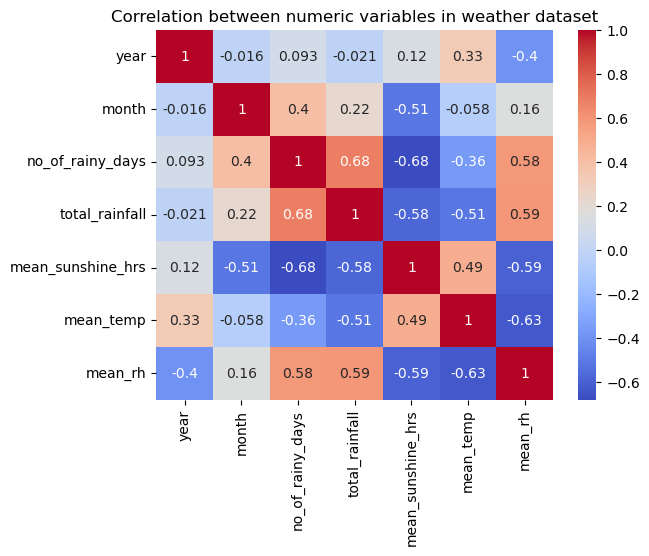

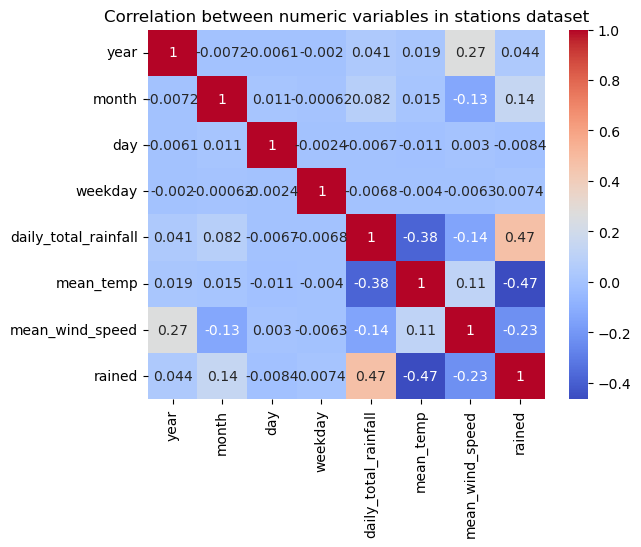

In [44]:
# Creating a heatmap for weather dataframe
sns.heatmap(weather.corr(), annot=True, fmt='.2g', cmap='coolwarm')
plt.title('Correlation between numeric variables in weather dataset')
plt.show()

# Creating a heatmap for stations dataframe
sns.heatmap(stations.corr(), annot=True, fmt='.2g', cmap='coolwarm')
plt.title('Correlation between numeric variables in stations dataset')
plt.show()

*Interpretation:*  
Possible correlations:  
- Number of rainy days with total rainfall (0.68)
- Number of rainy days with mean sunshine hour (-0.68)
- Number of rainy days with relative humidity
- Total rainfall with mean sunshine hour
- Total rainfall with mean relative humidity
- Mean sunshine hours with mean relative humidity
- Mean temperature with mean relative humidity (-0.63)

In [45]:
# Defining a function to visualize histograms
def visualize_distributions(data, titles):
    num_plots = len(data.columns)
    num_rows = int(np.ceil(num_plots / 3))
    fig, axes = plt.subplots(num_rows, 3, figsize=(20, 15))
    axes = axes.ravel()
    
    for i, column in enumerate(data.columns):
        ax = axes[i]
        data[column].hist(ax=ax, bins=20)
        ax.set_title(titles[i])
        ax.set_xlabel('Values')
        ax.set_ylabel('Frequency')
        ax.axvline(x=data[column].mean(), c='k')
        if i+1 == num_plots and (i-1) % 3 == 0:
            fig.delaxes(axes[i+1])
# Display the plot
    plt.show()

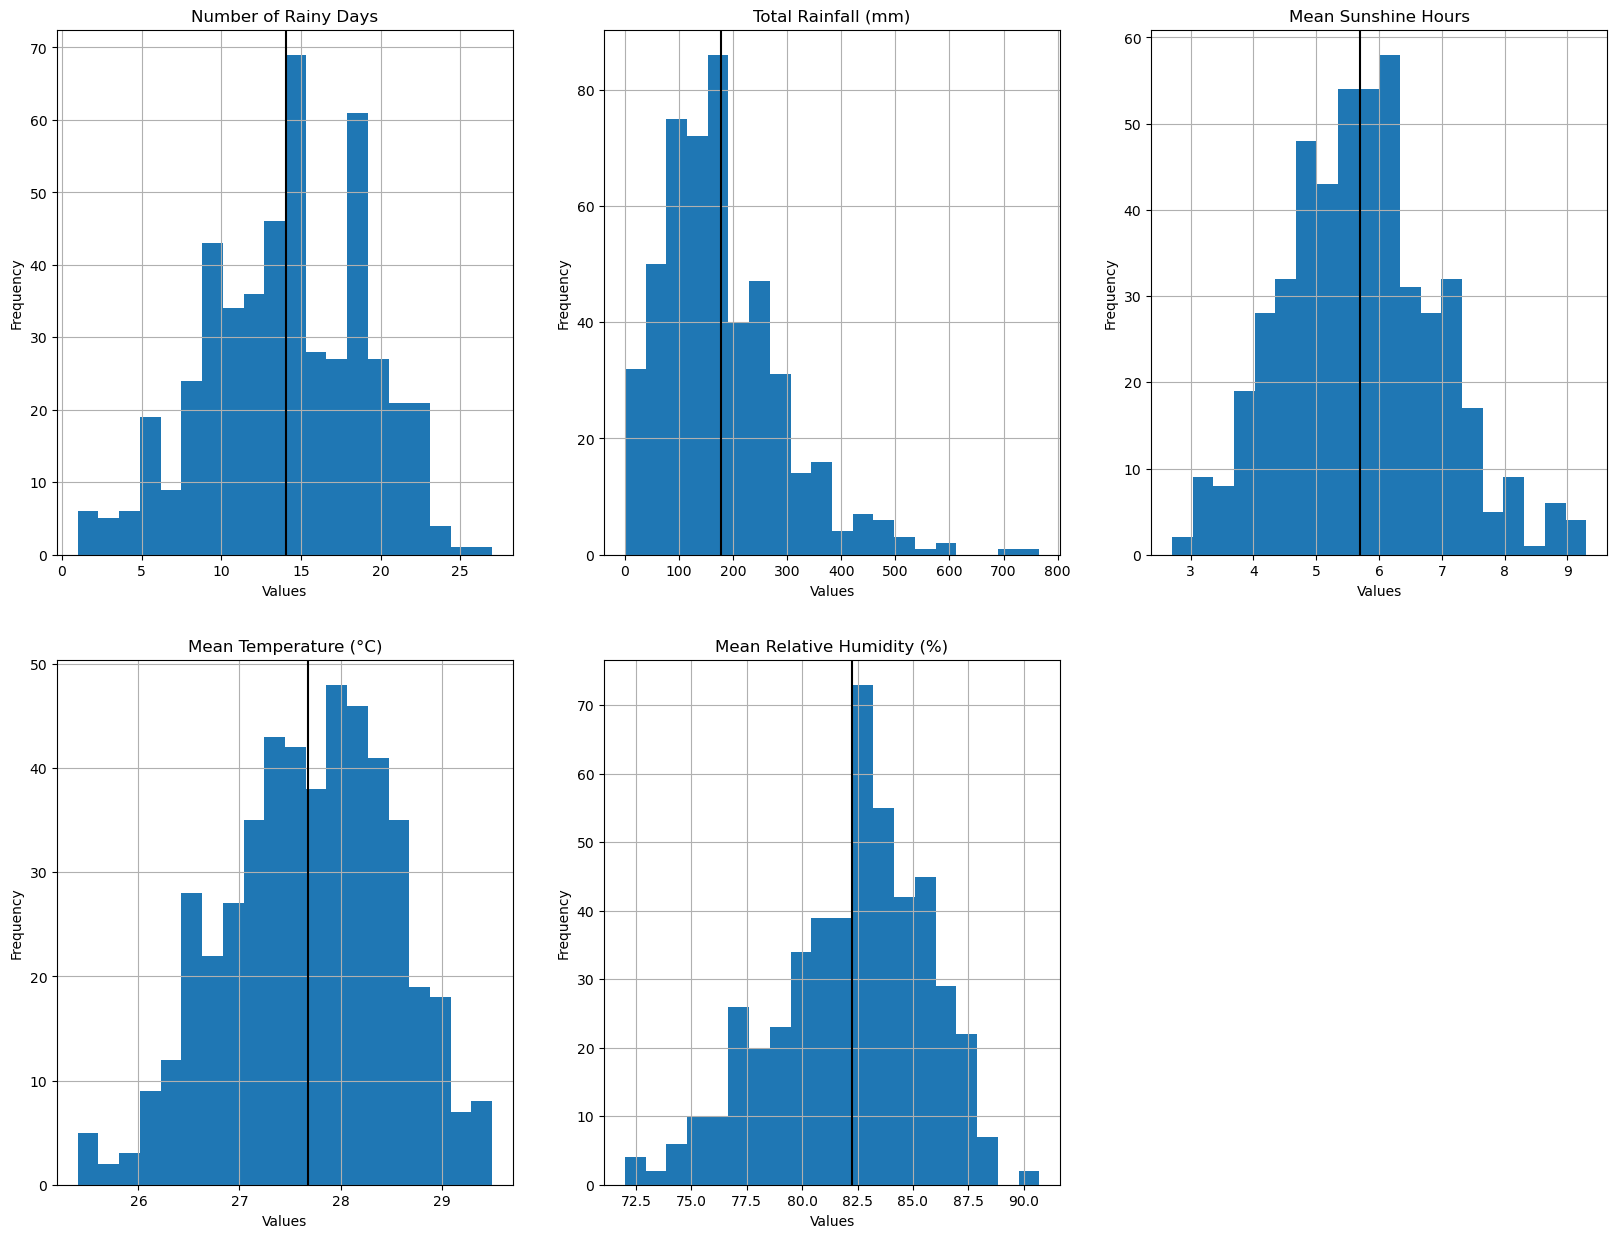

In [46]:
# Visualizing weather dataset as histograms
title_weather = ['Number of Rainy Days', 'Total Rainfall (mm)', 'Mean Sunshine Hours',\
                 'Mean Temperature (°C)', 'Mean Relative Humidity (%)']
weather_numeric = weather[['no_of_rainy_days','total_rainfall','mean_sunshine_hrs','mean_temp','mean_rh']]
visualize_distributions(weather_numeric, title_weather)

*Interpretation:*  
Number of rainy days, mean sunshine hours, mean temperature, and mean relative humidity seems to be normally distributed. Their means and medians are similar. 

Total rainfall has a right skewed distribution. This is because there is a few outliers in the dataset with particularly high rainfall, but this probably is a naturally occuring phenomena as these outliers mostly appear during the monsoon months.

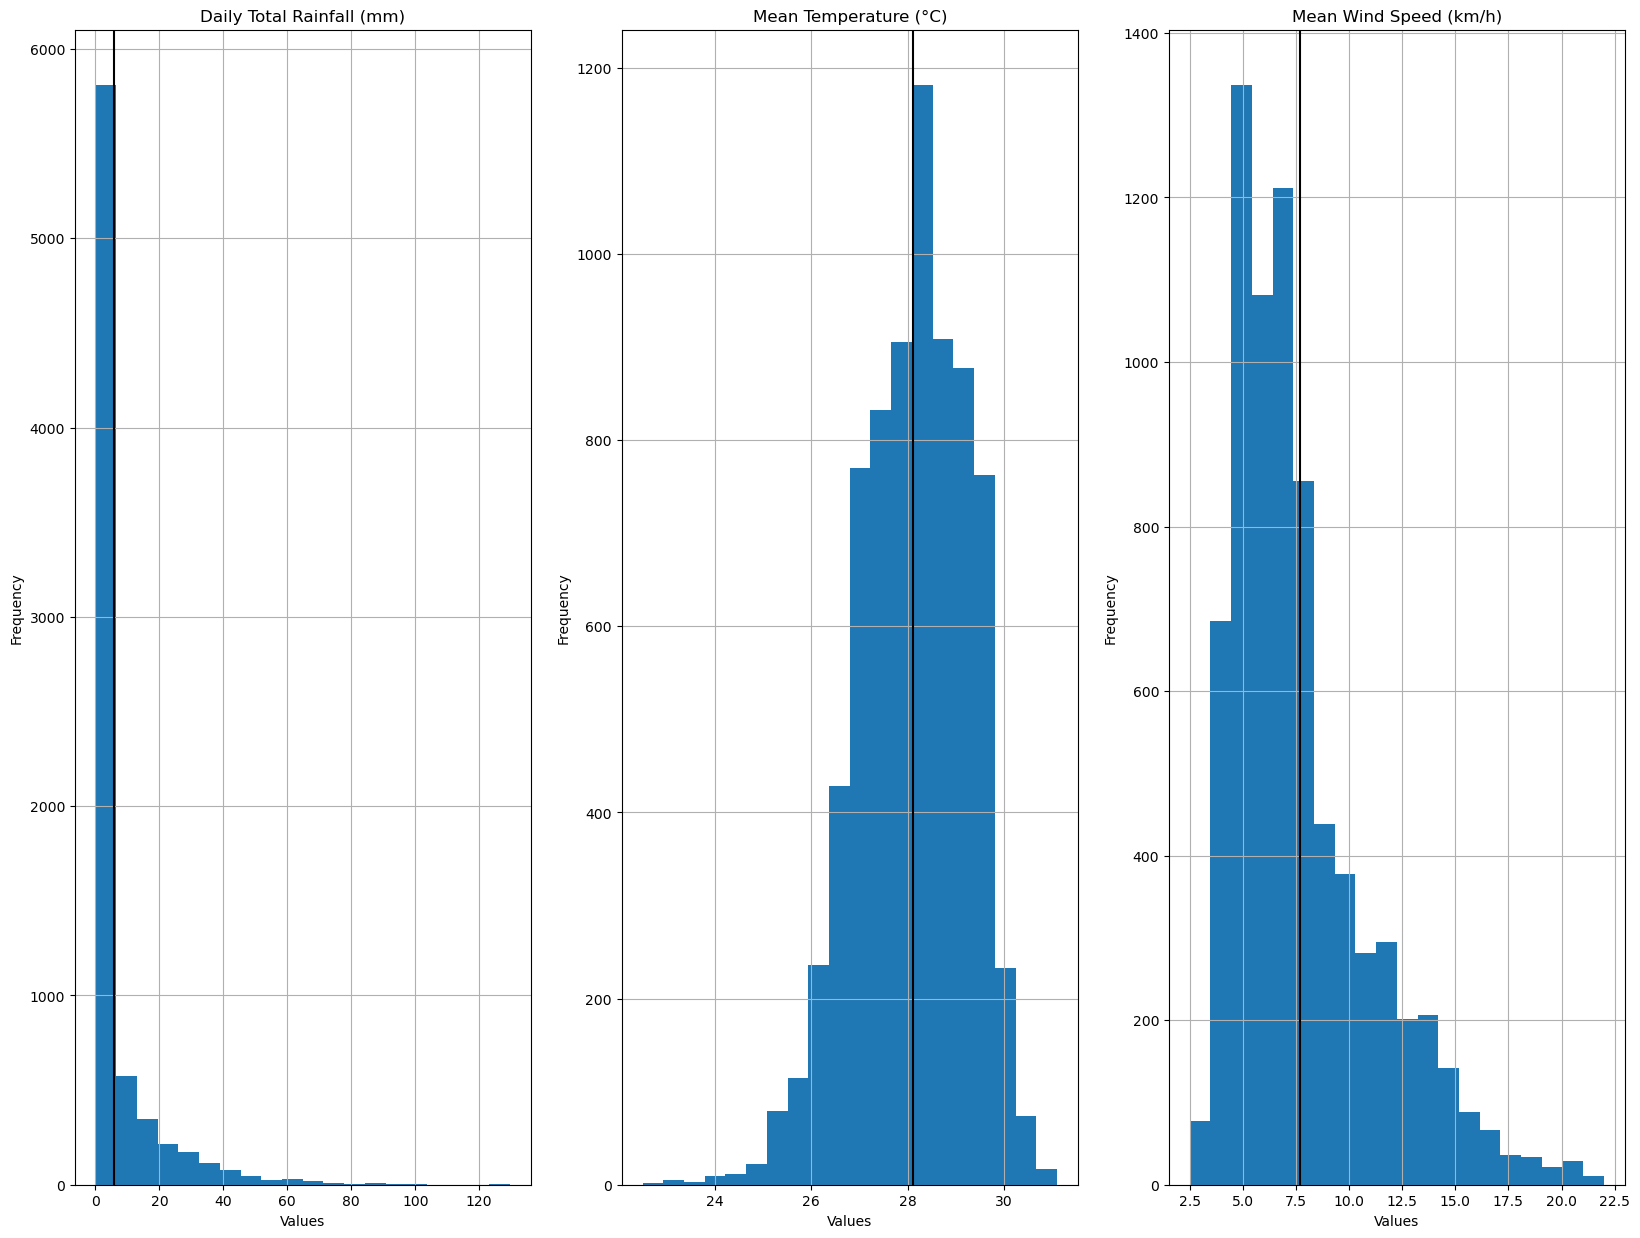

In [47]:
# Visualizing stations dataset as histograms
title_stations = ['Daily Total Rainfall (mm)', 'Mean Temperature (°C)', 'Mean Wind Speed (km/h)']
stations_numeric = stations[['daily_total_rainfall', 'mean_temp','mean_wind_speed']]
visualize_distributions(stations_numeric, title_stations)

*Interpretation:*  
Mean temperature is once again normally distributed.

Daily total rainfall and wind speed has a right skewed distribution.
- This is because the median values of both data sets are close to 0, and these values cannot be negative.
- The outliers in the datasets (probably a naturally occuring phenomenon) increases the mean and causes the histogram to be positively skewed. For daily total rainfall, the values are concentrated near 0 as there are a lot of data points where value=0 for days that did not rain.

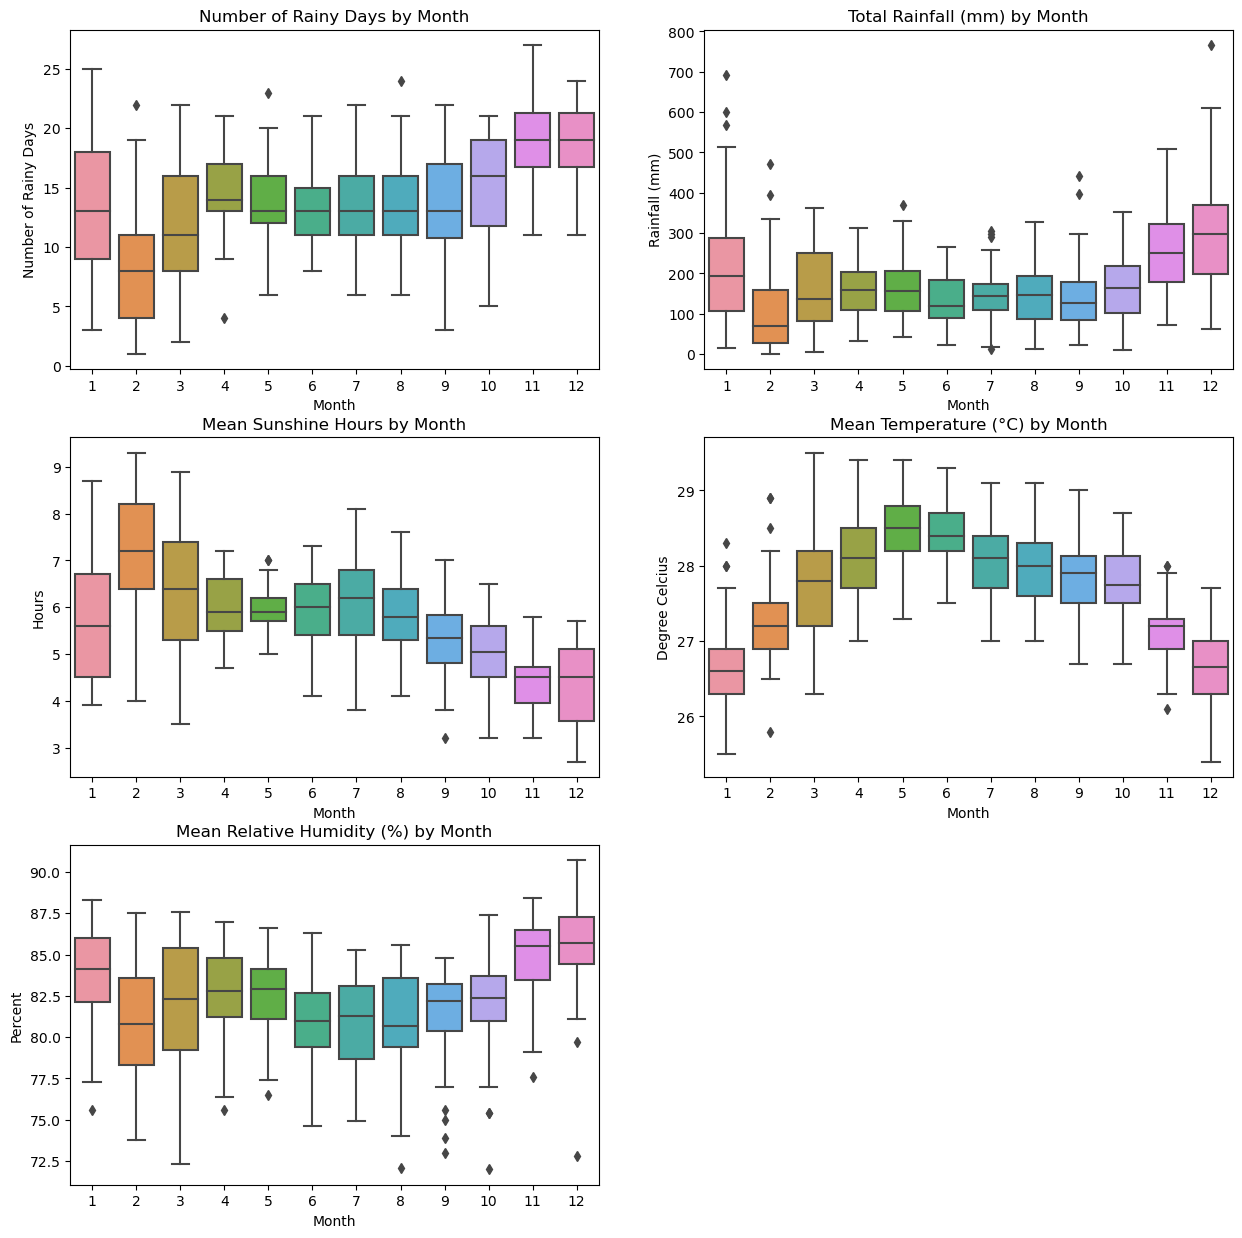

In [48]:
# Plotting boxplots for each column in the weather dataset grouped by month
title_weather = ['Number of Rainy Days by Month', 'Total Rainfall (mm) by Month', 'Mean Sunshine Hours by Month',\
                'Mean Temperature (°C) by Month', 'Mean Relative Humidity (%) by Month']
weather_numeric = ['no_of_rainy_days','total_rainfall','mean_sunshine_hrs','mean_temp','mean_rh']
y_labels = ['Number of Rainy Days', 'Rainfall (mm)', 'Hours', 'Degree Celcius', 'Percent']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15))

for i, column in enumerate(weather_numeric):
    ax = axes[i // 2, i % 2]
    sns.boxplot(data=weather, x='month', y=column, ax=ax)
    ax.set_title(title_weather[i])
    ax.set(xlabel='Month', ylabel = y_labels[i])
fig.delaxes(axes[2,1])
plt.show()

*Interpretation:*  
Number of rainy days, total rainfall and mean relative humidity show the same pattern, with medians being lowest in February, average from March through October, and highest from November through January.

Temperature seems to be highest in the middle of the year.

Mean sunshine hour seems to be inversely related to number of rainy days, total rainfall and mean relative humidity. Its median is highest in february, average from March through October, and lowest from November to December.

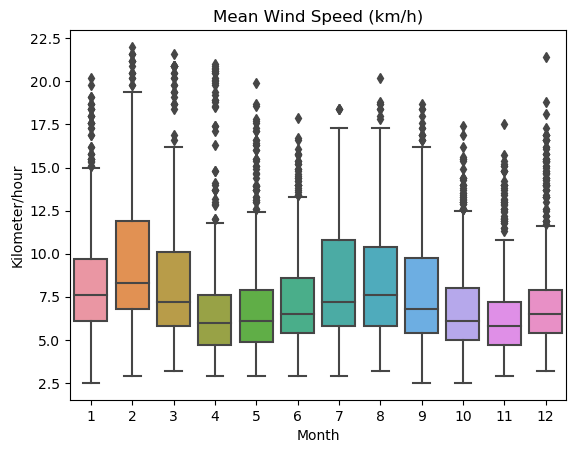

In [49]:
# Plotting a boxplot for mean wind speed in the stations dataset grouped by month
sns.boxplot(data=stations, x='month', y='mean_wind_speed')
plt.xlabel("Month")
plt.ylabel('Kilometer/hour')
plt.title('Mean Wind Speed (km/h)')
plt.show()

*Interpretation:* Mean wind speed shares a similar pattern to mean sunshine hour, but has much more outliers above the outer range.

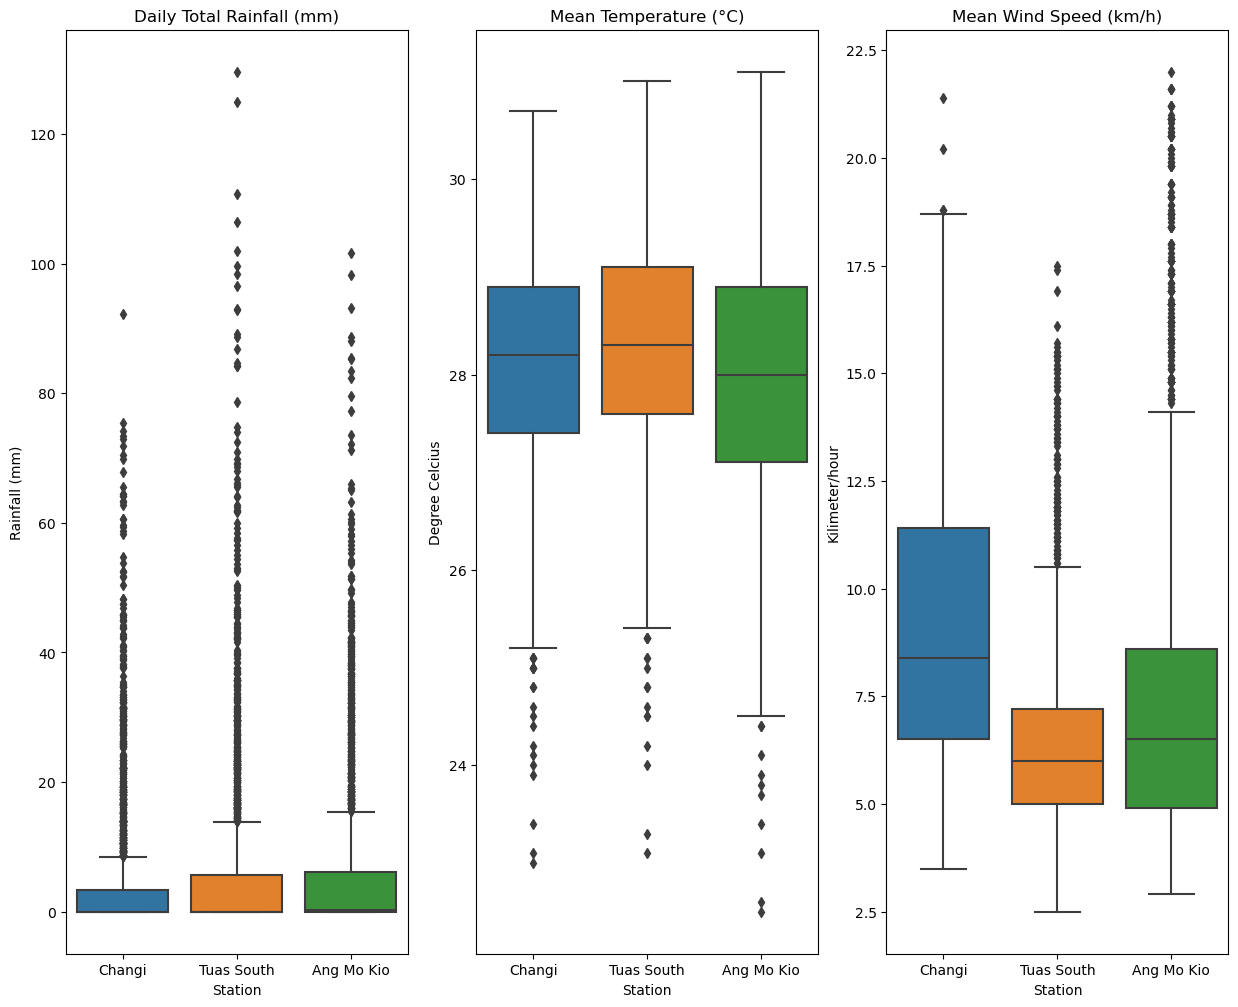

In [50]:
# Plotting boxplots for each column in the stations dataset grouped by station
title_stations = ['Daily Total Rainfall (mm)', 'Mean Temperature (°C)', 'Mean Wind Speed (km/h)']
stations_numeric = stations[['daily_total_rainfall', 'mean_temp','mean_wind_speed']]
y_labels = ['Rainfall (mm)', 'Degree Celcius', 'Kilimeter/hour']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,12))

for i, column in enumerate(stations_numeric):
    ax = axes[i]
    sns.boxplot(data=stations, x='station', y=column, ax=ax)
    ax.set_title(title_stations[i])
    ax.set(xlabel='Station', ylabel = y_labels[i])

plt.show()

*Interpretation:*  
- For rainfall, the median is very close to 0 and there is an abundance of outliers in daily total rainfall. This is explained by the fact that the dataset consist of days that do not rain, and days that rain, causing the large disparity in values. The range of values is also larger for Tuas and Ang Mo Kio compared to Changi.
- For temperature, the range is slightly larger for Ang Mo Kio compared to the other 2 stations.
- For wind speed, Changi seems to have lesser outlier values, compared to the other 2 stations. 

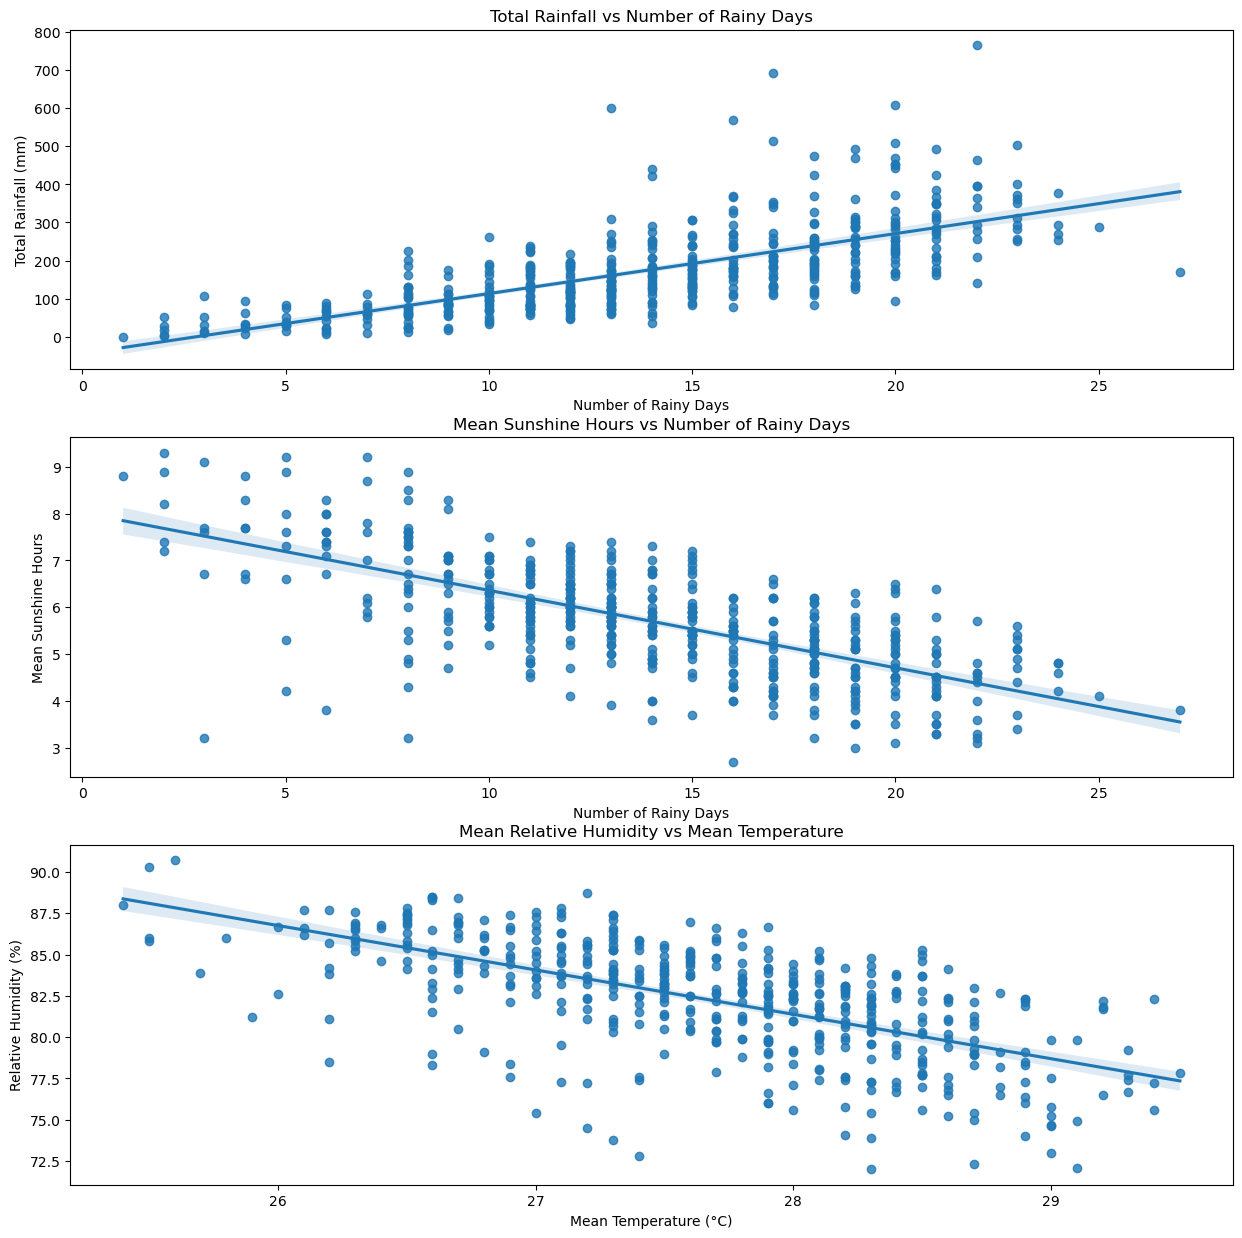

In [51]:
# Creating scatter plots of the top 3 pairs based on correlation coefficients
xlist = ['no_of_rainy_days', 'no_of_rainy_days', 'mean_temp']
ylist = ['total_rainfall', 'mean_sunshine_hrs', 'mean_rh']
titles = ['Total Rainfall vs Number of Rainy Days', 'Mean Sunshine Hours vs Number of Rainy Days', 'Mean Relative Humidity vs Mean Temperature']
xlabel = ['Number of Rainy Days', 'Number of Rainy Days', 'Mean Temperature (°C)']
ylabel = ['Total Rainfall (mm)', 'Mean Sunshine Hours', 'Relative Humidity (%)']
fig, axes = plt.subplots(3, 1, figsize=(15,15))
for i, (x, y) in enumerate(zip(xlist, ylist)):
    sns.regplot(data=weather, x=x, y=y, ax=axes[i])
    axes[i].set(xlabel=xlabel[i], ylabel=ylabel[i], title=titles[i])
plt.show()

*Interpretation:*  
Correlations to explore (top 3 correlation coefficients):
- Number of rainy days vs total rainfall
- Number of rainy days vs mean sunshine hour
- Mean temperature vs mean relative humidity  

Scatterplots and the regression line support a linear relationship between all 3 pairs of variable.  
Positive correlation between total rainfall and number of rainy days, and negative correlation between the other 2 pairs.

1) Positive correlation between total rainfall and number of rainy days
- This is logical. As the number of rainy days each month increases, so would the monthly total rainfall.

2) Negative correlation between mean sunshine hour and number of rainy days
- Rainy days are associated with clouds and lesser sunshine.
- As number of rainy days each month increases, the mean sunshine hour each day would decrease.

3) Negative correlation between relative humidity and temperature
- This is a known phenomenon. As temperature increases, water vapor saturation and hence relative humidity decreases.

They are all moderately strong correlations as their correlation coefficients are between 0.4-0.7.

In [52]:
# Defining a function to create barplots for both weather/stations dataset with different columns
def line_plot(data, columns, titles, ylabels):
    num_plots = len(dataframes)
    num_rows = int(np.ceil(num_plots / 2))
    
    fig, axes = plt.subplots(num_rows, 2, figsize=(15,10))
    plt.subplots_adjust(hspace=0.4)
    axes = axes.ravel()
    for i, column in enumerate(columns):
        sns.lineplot(data=data[i], x='month', y=column, ax=axes[i], ci=None)
        axes[i].set_title(titles[i])
        axes[i].set_xlabel('Month')
        axes[i].set_ylabel(ylabels[i])
        axes[i].set_xticks(range(1,13))
        if i==num_plots - 1 and i % 2 == 0:
            fig.delaxes(axes[i+1])

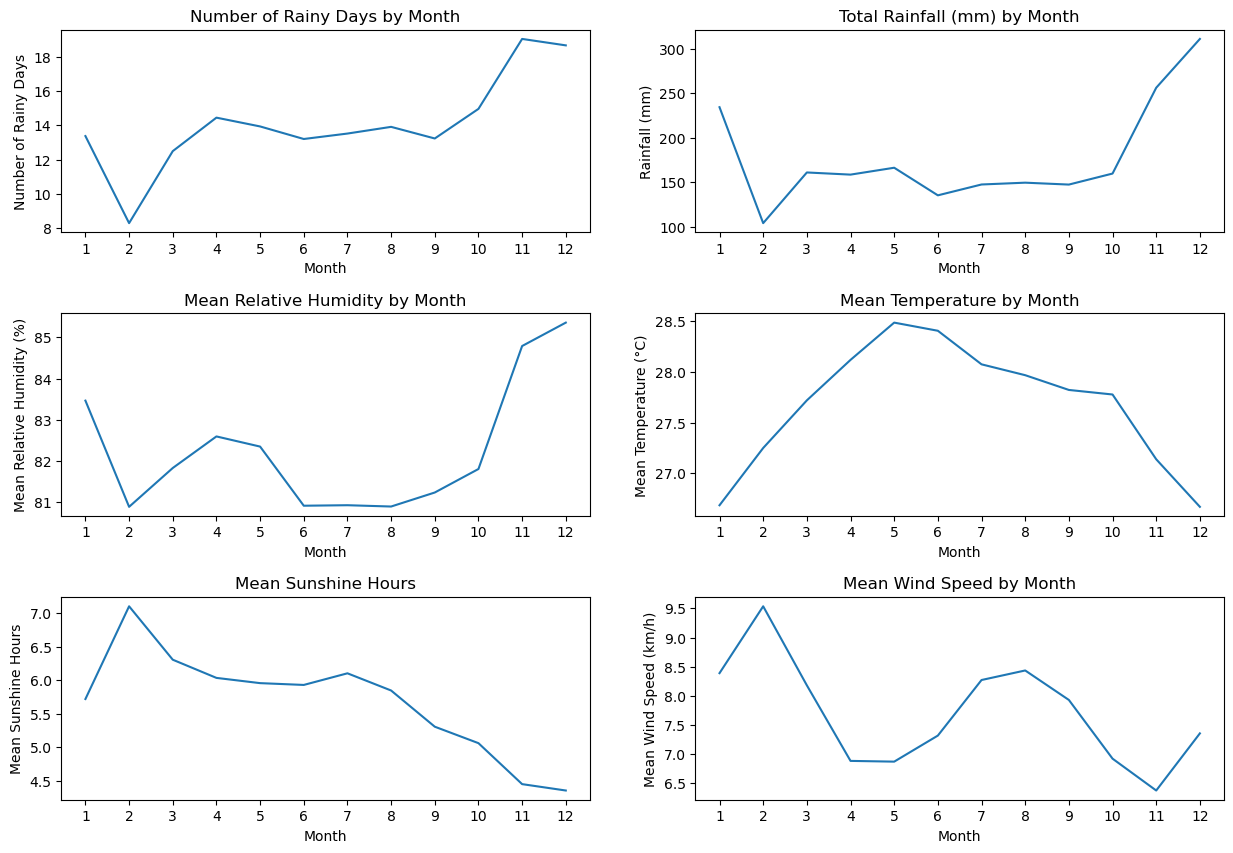

In [53]:
# Creating line plots for the following columns
columns = ['no_of_rainy_days', 'total_rainfall', 'mean_rh', 'mean_temp', 'mean_sunshine_hrs', 'mean_wind_speed']
dataframes = [weather, weather, weather, weather, weather, stations]
titles = ['Number of Rainy Days by Month', 'Total Rainfall (mm) by Month', 'Mean Relative Humidity by Month',\
          'Mean Temperature by Month', 'Mean Sunshine Hours', 'Mean Wind Speed by Month']
ylabel = ['Number of Rainy Days', 'Rainfall (mm)', 'Mean Relative Humidity (%)', 'Mean Temperature (°C)', 'Mean Sunshine Hours', 'Mean Wind Speed (km/h)']

line_plot(dataframes, columns, titles, ylabel)

*Interpretation:*
- November and December has the highest number of rainy days and monthly total rainfall (18-19 days, 250-300mm), whereas February has the lowest rainfall (8 days and 100mm). The rest of the year seems average around 14 days of rainy days and 150mm of rainfall.
- May and June seems to be the hottest months (\~28.5 degrees), whereas December and January are colder (~26.5 degrees).
- Relative humidity is the lowest in February, June to August (\~81%), and highest during November and December (~85%).
- February has the highest mean wind speed (9.5km/h), whereas November has the lowest mean wind speed (6.5km/h).
- February has the longest sunshine hours (7h), whereas November and December had the least (4.5h).

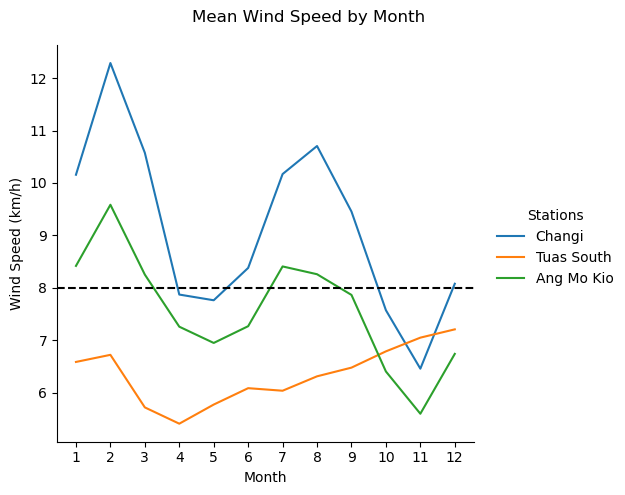

In [54]:
# Plotting a line plot to see the relationship between month and mean wind speed grouped by stations
g = sns.relplot(data=stations, hue='station', x='month', y='mean_wind_speed', kind='line', ci=None)
g.fig.suptitle('Mean Wind Speed by Month')
g.set_ylabels('Wind Speed (km/h)')
g.set_xlabels('Month')
g.set(xticks=range(1, 13))
g._legend.set_title('Stations')
g.refline(y=8, color='k', linestyle='--')
plt.show()

*Interpretation:*
- Wind speeds are generally highest during February.
- Wind speeds are relatively high during January-March, July-September
- Apart from November, Changi has the highest mean wind speed
- Changi has ideal wind speeds for flying kites from January to September

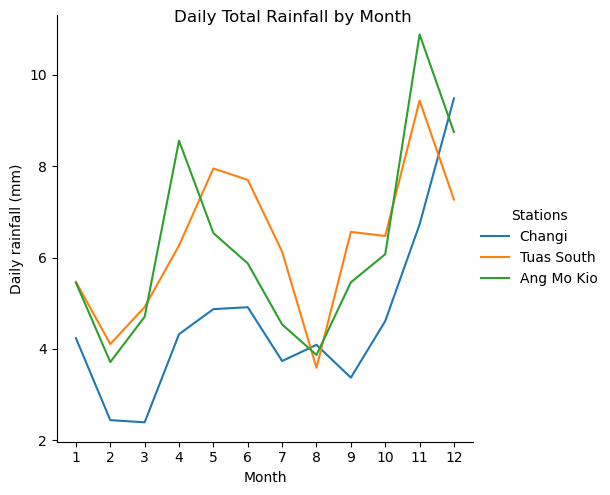

In [55]:
# Plotting a line plot to see the relationship between month and daily rainfall grouped by stations
g = sns.relplot(data=stations, hue='station', x='month', y='daily_total_rainfall', kind='line', ci=None)
g.fig.suptitle('Daily Total Rainfall by Month')
g.set_ylabels('Daily rainfall (mm)')
g.set_xlabels('Month')
g.set(xticks=range(1, 13))
g._legend.set_title('Stations')
plt.show()

*Interpretation:*
- Generally Changi has the lowest daily rainfall throughout the year
- Exceptions are August (all 3 are similar) and December (Ang Mo Kio is lower)

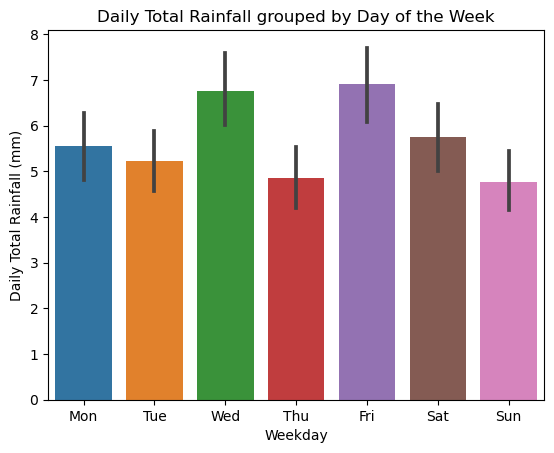

In [56]:
# Finding trend between weekday and rainfall
sns.barplot(data=stations,y='daily_total_rainfall', x='weekday')
plt.title('Daily Total Rainfall grouped by Day of the Week')
plt.ylabel('Daily Total Rainfall (mm)')
plt.xlabel('Weekday')
x = [0,1,2,3,4,5,6]
x_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(x, x_labels)
plt.show()

*Interpretation:* Wednesday and Friday has the highest mean rainfall whereas Thursday and Sunday has the lowest mean rainfall

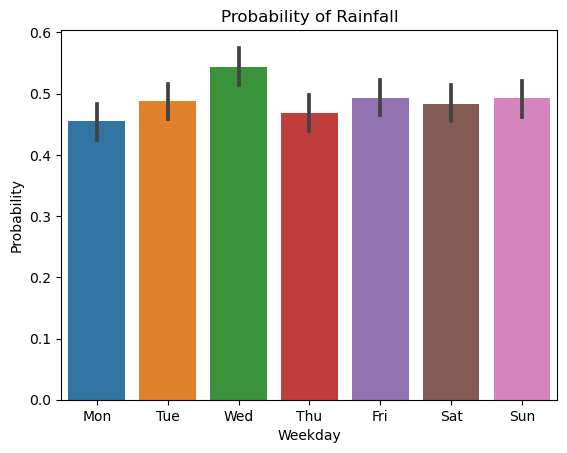

In [57]:
# Finding trend between weekday and chance of rainfall
sns.barplot(data=stations,y='rained', x='weekday')
plt.title('Probability of Rainfall')
plt.ylabel('Probability')
plt.xlabel('Weekday')
x = [0,1,2,3,4,5,6]
x_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(x, x_labels)
plt.show()

*Interpretation:* Weekdays with the lowest chance of rain include Mondays and Thursday whereas weekdays with the highest chance of rain is Wednesday.

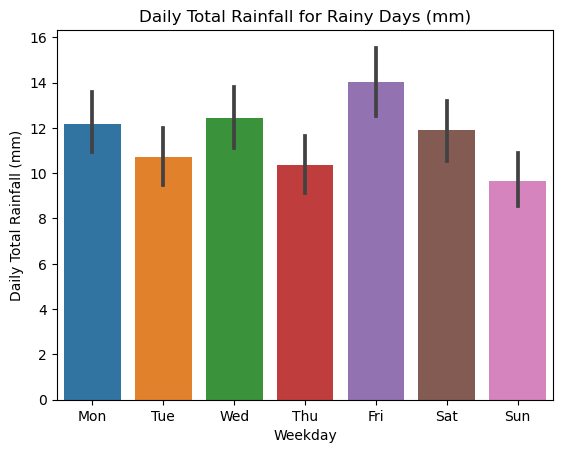

In [58]:
# Finding trend between weekday and rainfall volume for rainy days
sns.barplot(data=stations[stations['rained'] == 1], y='daily_total_rainfall', x='weekday')
plt.title('Daily Total Rainfall for Rainy Days (mm)')
plt.ylabel('Daily Total Rainfall (mm)')
plt.xlabel('Weekday')
x = [0,1,2,3,4,5,6]
x_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(x, x_labels)
plt.show()

*Interpretation:* For rainy days, Sunday has the lowest rainfall (9.7mm) and Friday has the heaviest rain (14 mm).

## Conclusions and Recommendations

### Conclusions

1) February may be the ideal month for picnics
- February emerges as a favorable month for picnics as it consistently has lower mean rainfall, number of rainy days, relative humidity and higher sunshine hours and wind speeds.
- This combination suggests a more comfortable and enjoyable outdoor environment for picnicking.
- February corresponds to the dry phase of the Northeast Monsoon when the rain-belt has moved further south to affect Java.

2) Be prepared for rainfall in November and December
- November and December consistently exhibit the highest number of rainy days and monthly total rainfall, making them the wettest months. In addition, these two months have lower mean temperature and a higher relative humidity.
- Higher rainfall occurs from November to January during the wet phase of northeast monsoon season, when the major tropical rainbelt (the Intertropical Convergence Zone ITCZ) is positioned near to us. 

3) Weekdays matter
- Wednesdays and Fridays has the highest mean daily rainfall whereas Thursday and Sunday has the lowest daily rainfall.
- Wednesdays has the highest chance of rain (54.4%), and has the second heaviest rainfall (12.4mm) on rainy days.
- Fridays has the heaviest rain (14 mm), and has the 2nd/3rd highest chance of rain (49.2%).
- Thursdays has both the second lowest chance of rain (46.8%) and the second lightest rain (10.4mm).
- Sundays has the 2nd/3rd highest chance of rain (49.2%) but it has the lightest rain (9.7mm).

4) Changi offers a higher chance of favorable weather conditions
- Changi has the highest mean wind speed and lowest daily rainfall for most months of the year.
- Decreased rainfall can be attributed to the rain shadow effect, where the presence of elevated terrain in the northern and western parts of Singapore cause the air to rise and release moisture on the windward side while descending and becoming drier on the leeward side (east). 
- Higher wind speeds can be attributed to the east being more exposed to the prevailing northerly to northeasterly winds during the northeast monsoon season.

5) Wind speed and kite-flying experience depends on both month and location
- Ideal wind speed for kite flying is 8km/h and above.
- Changi has the highest mean wind speed for most months of the year, being close or exceeding the 8km/h cut-off during Jan-Sep, and is possibly best place to fly kites.
- Ang Mo Kio shows decent wind speeds, being close or exceeding the 8km/h cut-off during two periods, Jan-Mar and Jul-Sep.
- Tuas/West has the lowest wind speed, does not meet the 8km/h cut-off throughout the year, and is possibly the worst place to fly kites.
- The inter-monsoon months (April, May, October and November) are transition periods between the monsoons and show lighter and more variable winds.

The factual data are obtained from: http://www.weather.gov.sg/climate-climate-of-singapore/

### Recommendations

1) Promote February as the ideal month for picnics
- February stands out as a month with the lowest mean rainfall, number of rainy days, relative humidity, and the highest mean sunshine hours and wind speed.
- Capitalize on these weather conditions to encourage customers to plan picnics during February.
- Launch targeted marketing campaigns highlighting the benefits of picnicking during this month, such as comfortable temperatures, minimal rainfall interruptions, and pleasant breezes.
- Offer special promotions and discounts on picnic essentials to attract customers during this ideal period.
- Promoting and scheduling picnics during February can attract more customers and enhance their overall experience.

2) Align inventory and product offerings with seasonal variations
- November and December experience the most rainfall.
- Align product offerings to mitigate the impact of rain. For example, picnic essentials such as tents, water-resistant mats, umbrellas, or raincoats can be offered during these months.
- Create packages that include contingency items like indoor games or entertainment options, ensuring customers can still enjoy their picnic experience even if the weather is less than ideal.
- Conduct further analysis on sales/demand of picnic essentials during different seasonal periods. For example, if there are lower sales during the November/December period, consider cutting back on inventory during this period.
- This targeted approach will save cost, attract customers and enhance their experience by providing relevant and seasonally appropriate picnic essentials.

3) Focus kite flying promotions/sales in the East during certain months
- Promote kite rentals and sales during February when wind conditions are optimal for kite flying. Other possible months include January-March and July-September.
- Organize kite-flying events or workshops to attract kite enthusiasts. These can be conducted in Changi/East and during the dry monsoon periods (January-March, July-September) where the wind conditions are optimal and lower chance of rain.
- Possible east-side picnic locations include: East Coast park, Pasir Ris park, Changi beach
- When planning picnics for customers, plan it in the east if there are concerns of rain or if the customers are interested in kite flying.

4) Thursdays may be the best weekday for picnics
- Avoid Wednesdays as it has the highest chance of rain.
- Avoid Fridays as it has the heaviest rainfall.
- Thursdays have the second lowest chance of rainfall and the second lightest rainfall.